# Прикладная статистика. ДЗ 3.
# Академия Аналитиков Авито


__Правила:__
- Жесткий дедлайн: **2022-02-27 17:59:59**. 
- Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW3-<ваше имя> через бота @AAA_stats23_bot
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

## Задача 1 (2 балла)

### На зачет

Мы проводили промо-акцию два раза.

- В первый раз мы отправили 38 писем, из них 26 получателей перешли по ссылке.

- Во второй раз мы отправили уже 98 писем, и из получателей по ссылке перешли 42.

С помощью критерия хи-квадрат определить, насколько значимо изменение CTR между акциями. Можем ли мы делать вывод о том, что информирование во второй промо-акции хуже, чем информирование в первой? Почему?

In [1]:
import numpy as np
from scipy.stats import chi2, chi2_contingency

**Применение критерия хи-квадрат для проверки гипотезы однородности выборок промо-акций**

In [2]:
count_table = np.array([[26, 38-26], [42, 98-42]])
print(f'{count_table=}')

_, pvalue, _, _ = chi2_contingency(count_table)
print(f'{pvalue=}')

count_table=array([[26, 12],
       [42, 56]])
pvalue=0.012979820360836461


**Вывод:** 
На уровне значимости 5% гипотеза однородности отвергается.  
Однако по имеющимся данным нельзя сказать, что вторая промо-акция хуже, чем первая, так как нет информации о тех людях, которым рассылались письма.
Возможно, 1ая группа людей более восприимчива к разного рода акциям, или у 2ой группы людей низкий заработок.

## Задача 2 (4 балла)

Реализовать критерий хи-квадрат для таблиц сопряженности $N \cdot M$.

- Условия применимости прверять не надо,  критерий будет проверяться на выборках больших размеров. 

Какими библиотеками вы можете пользоваться:
```
import numpy as np
from collections import namedtuple
from scipy.stats import chi2
```

In [5]:
import numpy as np
from collections import namedtuple
from scipy.stats import chi2

In [6]:
#Автопроверка

MyСhi2Results = namedtuple('MyСhi2Results', ['is_rejected', 'pvalue'])


def my_chi2_for_contingency_tables(sample_A: list, sample_B: list, alpha: float = 0.05):
    """
    Параметры:
    - sample_A: первая выборка сэмплированных значений
    - sample_B: вторая выборка, её значения -- номера выборок
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyСhi2Results с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """
    is_rejected = None
    pvalue = None
    total_size = len(sample_A)
    
    uniq_values = set(sample_A)
    k_elements = len(uniq_values)
    
    uniq_samples = set(sample_B)
    k_samples = len(uniq_samples)
    
    # Создание таблицы частотности
    elem_to_id = dict(zip(uniq_values, range(len(uniq_values))))
    sample_to_id = dict(zip(uniq_samples, range(len(uniq_samples))))
    count_table = np.zeros((k_samples, k_elements), dtype=np.uint32)
    
    for elem, sample in zip(sample_A, sample_B):
        elem_id = elem_to_id[elem]
        sample_id = sample_to_id[sample]
        
        count_table[sample_id, elem_id] += 1
    
    # ОМП вероятности выпадения value_j
    # probas.shape = (k_samples, k_elements)
    # sample_sizes.shape = (k_samples, k_elements)
    probas = count_table.sum(axis=0, keepdims=True) / total_size
    sample_sizes = count_table.sum(axis=1, keepdims=True)
    
    probas = np.broadcast_to(probas, count_table.shape)
    sample_sizes = np.broadcast_to(sample_sizes, count_table.shape)
    
    prob_times_sample_size = probas * sample_sizes
    stat = np.sum(
        np.square(count_table - prob_times_sample_size) / prob_times_sample_size
    )
    
    dof = (k_elements - 1) * (k_samples - 1)
    pvalue = 1 - chi2.cdf(stat, dof)
    is_rejected = pvalue < alpha
    
    return MyСhi2Results(is_rejected, pvalue)

**Тесты**

In [12]:
import scipy.stats as sps


def get_count_table(sample_A: list, sample_B: list) -> np.ndarray:
    total_size = len(sample_A)
    
    uniq_values = set(sample_A)
    k_elements = len(uniq_values)
    
    uniq_samples = set(sample_B)
    k_samples = len(uniq_samples)
    
    # Создание таблицы частотности
    elem_to_id = dict(zip(uniq_values, range(len(uniq_values))))
    sample_to_id = dict(zip(uniq_samples, range(len(uniq_samples))))
    count_table = np.zeros((k_samples, k_elements), dtype=np.uint32)
    
    for elem, sample in zip(sample_A, sample_B):
        elem_id = elem_to_id[elem]
        sample_id = sample_to_id[sample]
        
        count_table[sample_id, elem_id] += 1
        
    return count_table


def test_my_chi2_criterion(sample_1: list, sample_2: list):
    count_table = get_count_table(sample_1, sample_2)

    _, pvalue = my_chi2_for_contingency_tables(sample_1, sample_2)
    _, true_pvalue, _, _ = chi2_contingency(count_table, correction=False)
    
    print(abs(pvalue - true_pvalue) < 1e-6)


np.random.seed(1234)

n = 1000

sample_1 = np.random.randint(1, 6, n)
sample_2 = np.random.randint(1, 4, n)
test_my_chi2_criterion(sample_1.tolist(), sample_2.tolist())

xk = np.arange(1, 6)
pk = (0.15, 0.2, 0.3, 0.15, 0.2)
custm = sps.rv_discrete(name='custm', values=(xk, pk))

sample_3 = custm.rvs(size=n)
sample_4 = np.zeros(n).tolist() + np.ones(n).tolist()
sample_13 = sample_1.tolist() + sample_3.tolist()

test_my_chi2_criterion(sample_3.tolist(), sample_2.tolist())
test_my_chi2_criterion(sample_13, sample_4)

True
True
True


## Задача 3 (3 балла)

### На зачет

Компьютер периодически отправляет запросы на сервер. Иногда сервер бывает недоступен, поэтому компьютер с некоторым интервалом повторяет запросы до тех пор, пока сервер не ответит. Известно, что 52 запроса дошли с первой попытки, 31 &mdash; со второй, 3 &mdash;  с третьей, а для доставки еще 5 запросов потребовалось более 4  попыток. Верно ли, что сервер получает запросы с вероятностью 2/3?

**Задачу нужно решить теоретически!**

Можно воспользоваться лишь библиотекой `from scipy.stats import chi2`.

**Решение:**  
Применим критерий хи-квадрат для проверки простой гипотезы о совпадении теоретического и эмпирического распределений, которые соответствуют строкам в этой таблице:

<u> Напоминание:</u> $\xi \sim 1 + \text{Poiss}(\theta), 
\quad P(\xi = m) = \dfrac{\theta^{m-1} \cdot \exp(-\theta)}{(m-1)!}$

|  | 1 attempt | 2 attempts | 3 attempts | >= 4 attempts |
|---|---|---|---|---|
| Sampled | $\dfrac{52}{91}$ | $\dfrac{31}{91}$ | $\dfrac{3}{91}$ | $\dfrac{5}{91}$ |
| $$1 + Poiss(2/3)$$ | $$\exp(-2/3)$$ | $$\dfrac{2}{3} \cdot \exp(-2/3)$$ | $$\dfrac{2}{9} \cdot \exp(-2/3)$$ | $$1 - \dfrac{17}{9} \cdot \exp(-2/3)$$ |

Число степеней свободы = 4 - 1 = 3

In [111]:
from scipy.stats import chi2


n = 52 + 31 + 3 + 5
empirical_proba = np.array([52/n, 31/n, 3/n, 5/n])
exp23 = np.exp(-2/3)
theoretical_proba = np.array([exp23, 2/3*exp23, 2/9*exp23, 1 - 17/9*exp23])

stat = n * np.sum(np.square(empirical_proba - theoretical_proba) / theoretical_proba)
dof = 3
pvalue = 1 - chi2.cdf(stat, dof)
print(f'{pvalue=}')

pvalue=0.05289640738966783


**Вывод:**

На уровне значимости $\alpha = 0.05$ гипотеза не отвергается

## Задача 4 (4 балла)


Компания по производству коромов для попугаев провела опрос среди 5000 владельцев попугаев о том, что предпочитают есть их питомцы. По результатам опроса оказалось, что 1010 птиц предпочитают глазированные сырки, 2200 &mdash; фрукты, 950 &mdash; семечки и крупы, а все остальные предпочитают колбасу. Компания сделала предположение, что вероятности предпочтения этих видов еды равны $\theta, 2\theta, \theta, 1-4\theta$, где $\theta \in (0, 1/4)$. Верно ли данное предположение?

**Задачу нужно решить теоретически!**

Можно воспользоваться лишь библиотекой `from scipy.stats import chisquare`.

P.S. Задача появилась из рациона попугая составителя домашнего задания...

**Решение:**

Применим критерий хи-квадрат для проверки сложной гипотезы о попадании эмпирического распределения в заданный класс распределений

$n = 5000$  
$[n_1, n_2, n_3, n_4] = [1010, 2200, 950, 840]$  
$\bigl[ p_1(\theta), p_2(\theta), p_3(\theta), p_4(\theta) \bigr] = \bigl[ \theta, 2 \theta, \theta, 1 - 4 \theta \bigr]$

Статистика критерия имеет следующий вид:  
$\large
\widehat{\chi} = \sum\limits_{i=1}^4 \dfrac{(n_j - n p_j(\hat{\theta}))^2}{n p_j(\hat{\theta})}$,

где $\hat{\theta}$ ~--- оценка максимального правдоподобия.  
Она вычисляется след. образом: $\normalsize \underset{\theta}{\text{argmax}} \sum\limits_{i=1}^4 n_j \ln{p_j(\theta)}$

Приравняв производную к нулю, получаем такое равенство:  

$\dfrac{1010}{\theta} + \dfrac{2200}{\theta} + \dfrac{950}{\theta} - 4 \dfrac{840}{1 - 4\theta} = 0$

$\dfrac{4160}{\theta} - \dfrac{3360}{1 - 4\theta} = 0$

$4160 - (4160 \cdot 4 + 3360) \theta = 0$

$\theta = \dfrac{4160}{20000} = 0.208$

Проверим, что данная точка является максимумом функции правдоподобия

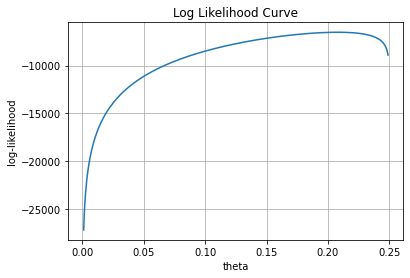

In [107]:
import matplotlib.pyplot as plt


def likelihood(theta: float) -> float:
    return \
        1010*np.log(theta) + \
        2200*np.log(2*theta) + \
        950*np.log(theta) + \
        840*np.log(1-4*theta)

ticks = np.linspace(0.001, 0.249, 500)
values = list(map(likelihood, ticks))

plt.title('Log Likelihood Curve')
plt.plot(ticks, values)
plt.xlabel('theta')
plt.ylabel('log-likelihood')
plt.grid(True)
plt.show()

Вычисляем статистику и применяем критерий

In [126]:
from scipy.stats import chisquare


n = 5000
sampled = np.array([1010, 2200, 950, 840])
theta_mle = 0.208

probas = np.array([theta_mle, 2*theta_mle, theta_mle, 1-4*theta_mle])
_, pvalue = chisquare(sampled, probas*n, ddof=1)

print(f'Theoretical = {probas*n}')
print(f'Empirical = {sampled}')
print(f'{pvalue = }')

Theoretical = [1040. 2080. 1040.  840.]
Empirical = [1010 2200  950  840]
pvalue = 0.00041449007074133005


**Вывод:**  
При любом разумном уровне значимости нулевая гипотеза отвергается

## Задача 5 (4 балла) 

Критерий назовается состоятельным, если его мощность сходится к 1 при $n \rightarrow +\infty$ при любом распределении, соответсвущем альтернативной гипотезе. Докажите сотсоятельность критериев согласия
- A) (2 балла) Колмогорова и
- B*) (2 балла) Хи-квадрат,

проверяющих

$$H_0: F = F_0$$

Где F - функция распределения текущей выборки, $F_0$ - предполагаемая функция распределения.

**Задачу нужно решить теоретически!**

**Решение А:**  
$\normalsize F \neq F_0 ==> \exists x_0 \; |F(x_0) - F_0(x_0)| = C > 0$

$\normalsize D_n = \underset{x}{\text{sup }} |F_n^*(x) - F_0(x)| \geqslant |F_n^*(x_0) - F_0(x_0)| \underset{n \rightarrow +\infty}{\longrightarrow} |F(x_0) - F_0(x_0)| = C > 0$

Значит, при $n > N \quad \sqrt{n}D_n \geqslant \sqrt{n} \dfrac{C}{2} \rightarrow +\infty$, то есть $\sqrt{n}D_n$ принимает сколь угодно большие значения

Теперь вспомним, что критическое множество имеет такой вид: $\bigl\{ \sqrt{n}D_n > K_{1-\alpha} \bigr\}$

Отсюда делаем вывод, что критерий состоятелен, поскольку почти наверное значение статистики попадает в критическое множество

**Решение В:**  
Обозначим за $\widehat{p_j}$ частотную оценку вероятности, $p_j^0$ ~--- вероятности из нулевой гипотезы, $P(\xi = a_j) = p_j$ ~--- истинные значения вероятностей

Вспомним, как выглядит статистика этого критерия:  
$\normalsize X_n^2 = n \sum\limits_{j=1}^K \dfrac{1}{p_j^0} (\widehat{p_j} - p_j^0)^2$

Если верна альтернатива и носители функций плотности равны (иначе нет смысла проверять гипотезу, разные носители ~--- разные распределения), то существует индекс $i$ такой, что $\normalsize p_i^0 \neq p_i \text{ и } p_i^0 > 0$.

Тогда по УЗБЧ и теореме о наследовании сходимости $\normalsize (\widehat{p_ш} - p_i^0)^2 \underset{n \rightarrow +\infty}{\longrightarrow} (p_i - p_i^0)^2 = C > 0$

Значит, $\normalsize X_n^2 \geqslant nC \rightarrow +\infty$

Критическое множество имеет вид: $\bigl\{ X_n^2 > \chi_{1 - \alpha} \bigr\}$

Такми образом, доказали состоятельность критерия.

## Задача 6.A (2 балла)

### На зачет

Какие критерии однородности вы можете привести на текущий момент? Приведите минимум 4 примера и в каких случаях можно использовать каждый из них?

<font size='3'>
$\normalsize H_0: F \equiv G$ - однородности  

$\normalsize H_1: \exists x \quad F(x) \neq G(x)$ - неоднородности  

$\normalsize H_2: G(x) \leqslant F(x) \Rightarrow P(Y \geqslant t) \geqslant P(X \geqslant t) \Rightarrow Y \geqslant X$ - доминирования  

$\normalsize H_3: G(x) = F(x - \theta), \; \theta > 0$ - сдвига
    
<u> Замечание:</u> Для всех критериев предполагаем независимость $(X_1, \ldots, X_n, Y_1, \ldots, Y_m)$ и $\dfrac{n}{n + m} \rightarrow \gamma \in (0, 1)$

1. **Критерий Смирнова** ($H_1$)  
    <u>Границы применимости:</u> непрерывность распр-ий, $n, m \geqslant 20$
    $\normalsize D_{nm} = \underset{x}{\sup} |\hat{F_n}(x) - \hat{G_m}(x)| = \max(D_{nm}^+, D_{nm}^-)$  
    $\normalsize D_{nm}^+ = \underset{1 \leqslant i \leqslant n}{\max}(\dfrac{i}{n} - \hat{G_m}(X_{(i)}))$  
    $\normalsize D_{nm}^- = \underset{1 \leqslant j \leqslant m}{\max}(\dfrac{j}{m} - \hat{F_n}(Y_{(j)}))$  
    Если $H_0$ - верна, то $\normalsize P\biggl( \sqrt{\dfrac{nm}{n+m}} D_{nm} \leqslant x\biggr) \underset{n, m \rightarrow \infty}{\longrightarrow} K(x)$  
    Критическое множество: $\normalsize \biggl\{ \sqrt{\dfrac{nm}{n+m}} D_{nm} \geqslant K_{1 - \alpha} \biggr\}$  
    <u> Замечание: </u> В случае $H_2$ надо применять односторонний критерий, основанный на статистике $D_{nm}^+$  
    $P(\sqrt{nm / (n+m)} D_{nm}^+ \leqslant t) \longrightarrow 1 - \exp{(-2t^2)} \text{ при } n, m \rightarrow +\infty$  
    
    <u> Поправка:</u> $S_{CM} = \sqrt{nm / (n+m)} \bigl( D_{nm} + \dfrac{m+n}{4.6 mn} \bigr)$
2. **Критерий Розенблатта (Андерсена-Дарлинга)** ($H_1$)  
    <u>Границы применимости:</u> непрерывность распр-ий, $n, m \geqslant 20$  
    $\normalsize \omega_{nm} = \int\limits_{-\infty}^{+ \infty} (\hat{F_n}(x) - \hat{G_m}(x))d\hat{H_{n+m}}(x) \text{, где } \hat{H_{n+m}}(x) = \dfrac{n}{n+m} \hat{F_n}(x) + \dfrac{m}{n + m}\hat{G_m}(x)$  
    $\normalsize \omega_{nm}$ можно выразить через ранги $X_i$ и $Y_j$ в совместном вариационном ряду (лень техать формулу)  
    $Z = Z_{nm} = \dfrac{nm}{n+m}\omega_{nm}^2$  
    Если $H_0$ верна, то $\normalsize P(Z \leqslant x) \underset{n, m \rightarrow \infty}{\longrightarrow} A_1(x)$  
    Критическое множество: $\normalsize \bigl\{ Z \geqslant A_{1 - \alpha} \bigr\}$
    
    Для маленьких выборок применяют следующую поправку (хорошо при n, m >= 7):  
    
    $Z^* = \dfrac{Z - EZ}{\sqrt{45 DZ}} + \dfrac{1}{6}$
3. **Критерий Манна-Уитни для случая различных элементов в выборке** ($H_2, H_3$)  
    <u>Границы применимости:</u>  
        - для непрерывных распределений: n, m >= 20  
        - для дискретных распределений: проверить методом Монте-Карло при каких n, m распределение статистики станет похоже на нормальное
    
    Пусть $S_j$ - ранг $Y_j, \quad V = S_1 + \ldots + S_m$  
    Статистика критерия: $U = \sum\limits_{i=1}^n \sum\limits_{j=1}^m I(X_i < Y_j) = V - \dfrac{m(m+1)}{2}$  
    $EU = \dfrac{nm}{2}, \; DU = \dfrac{1}{12}nm(n+m+1)$  
    Если $H_0$ - верна, то $U^* = \dfrac{U - EU}{\sqrt{DU}} \overset{d}{\longrightarrow} Z \sim \mathcal{N}(0, 1)$  
    Критическое множество: $\normalsize \bigl\{ |U^*| \geqslant z_{1 - \alpha/2} \bigr\}$  
    В случае отвержения $H_0$ сдвиг $\theta$ можно оценить как $MED(Y_j - X_i)$
4. **Однородность норм.выборок** ($H_1$)  
    <u>Границы применимости:</u> никогда. Почему?  
        - критические значения статистики F существенно изменяются при небольших возмущениях модели
        - критерий Стьюдента становится менее эффективным при отклонении от строгой нормальности
    $X_i \sim \mathcal{N}(\mu_1, \sigma_1^2), \; Y_j \sim \mathcal{N}(\mu_2, \sigma_2^2), X_i \text{ и } Y_j \text{независимы}$  
    $S_1^2, S_2^2$ - несмещённая выборочная дисперсия
    
    1) **Критерий Фишера**  
    $\normalsize H': \sigma_1 = \sigma_2, \mu_1 \text{ и } \mu_2 - \text{ любые}$
    
    Если $H'$ верна, то $\normalsize \dfrac{S_1^2}{S_2^2} \sim F_{n-1, m-1}$  
    Критическое множество: $\normalsize \bigl\{ F \geqslant f_{1 - \alpha} \bigr\}$
    
    Если $H'$ не отвергается, то остаётся проверить гипотезу $\normalsize H'': \mu_1 = \mu_2$ 
    
    2) **Критерий Стьюдента**  
    $\normalsize S_{tot}^2 = \dfrac{n-1}{n+m-2} S_1^2 + \dfrac{m-1}{n+m-2} S_2^2$  
    
    $\normalsize H'': \mu_1 = \mu_2$  
    
    $\normalsize T = \dfrac{\overline{X} - \overline{Y}}{S_{tot} \sqrt{\frac{1}{n} + \frac{1}{m}}} \sim t_{n+m-2}$  
    Критическое множество: $\normalsize \bigl\{ T \geqslant t_{1 - \alpha} \bigr\}$
    
5. **Критерий хи-квадрат для двух выборок** ($H_1$)  
    <u>Границы применимости:</u> дискретное распределение, все элементы таблицы >= 5, всего элементов >= 50, размеры выборок не должны сильно отличаться друг от друга (иначе может возникнуть парадокс Симпсона)
</font>    

## Задача 6.B (4 балла)

Какой критерий однородности вы стали бы использовать на практике и в каких случаях?

От вас ожидаетя практический ответ на вопрос: будете ли вы в работе использовать этот критерий в качестве критерия однородности? Рассмотрите разные случаи и выборки. 

Сделайте финальный выбор.

**Решение:**  
    1. Для дискретных распределений однозначно применяем хи-квадрат. Однако к результатам стоит относиться с осторожностью. Например, может оказаться так, что метрика выросла отдельно по каждой когорте, но при объединении групп окажется, что метрика никак не улучшилась. Этот эффект вызван непропорциональном размере когорт.  
    2. Критерии Смирнова и Розенблатта разработаны таким образом, чтобы быть чувствительными ко всем возможным типам различий. По этой причине их лучше использовать в случае, когда необходимо задетектировать сильные различия в законах, соответствующих выборкам. То есть их лучше не использовать в случае, когда хотим обнаружить незначительный прирост метрики.  
    У дефолтного критерия Смирнова есть несколько недостатков. Во-первых, это медленная скорость сходимости к распр-ию Колмогорова. У критерия Розенблатта распределение статистики очень быстро сходится к распр-ию $A_1(x)$, Во-вторых, значения статистики $D_{nm}$ образуют решётку с шагом $1 / \text{lcm}(n, m)$, где lcm - наименьшее общее кратное. Поэтому, лучше брать взаимно простые $m$ и $n$ или применить поправку, указанную выше. [Источник](https://ami.nstu.ru/~headrd/seminar/publik_html/Izm_T_8.htm)  
    На практике лучше использовать критерий Смирнова с указанными выше поправками, поскольку статистика вычисляется проще, чем статистика Розенблатта, и предельное распределение имеет явную формулу в отличие от Розенблатта.  
    3. Критерий Манна-Уитни стоит применять в случае, когда заранее известно, что внесённое изменение полностью сдвигает функцию распределения. В частности, когда тестовая выборка сдвинута на некоторое положительное значение или отмасштабирована. В [конце статьи](https://habr.com/ru/company/avito/blog/709596/) приводится пример с синтетической выборкой, в которой показывается большая чувствительность критерия Смирнова по сравнению с критерием Манна-Уитни, но пример ниже показывает, что это не всегда так.   

**Статистика критерия Смирнова и её поправки**

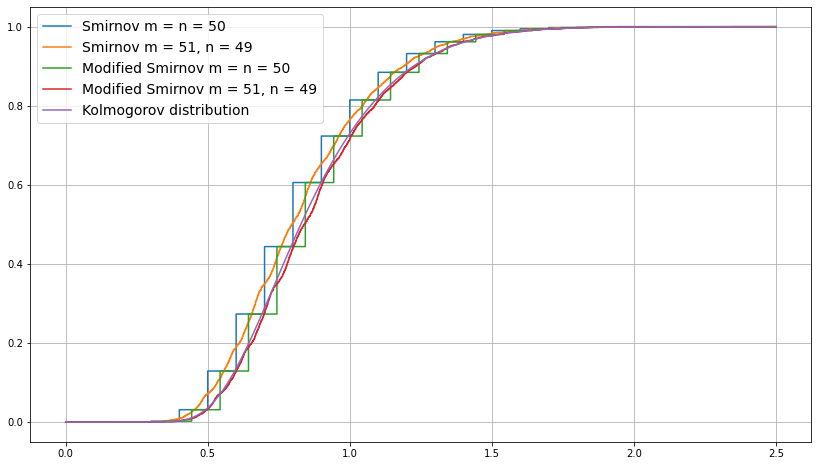

In [410]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import kolmogorov


EDF_LEFT_LIMIT = 0
EDF_RIGHT_LIMIT = 2.5

def get_edf_points(
        sample: np.ndarray,
        xmin: float = EDF_LEFT_LIMIT,
        xmax: float = EDF_RIGHT_LIMIT) -> (np.ndarray, np.ndarray):
    edf_arr = ECDF(sample)
    edf_x_arr = np.copy(edf_arr.x)
    edf_x_arr[0] = xmin
    edf_x_arr = np.append(edf_x_arr, xmax)
    edf_y_arr = np.append(np.copy(edf_arr.y), 1)
    
    return edf_x_arr, edf_y_arr

    
np.random.seed(2022)

distr_1 = sps.expon(loc=2, scale=5)
distr_2 = sps.expon(loc=2, scale=5)
k_experiments = 5000
n_common = 50
m, n = 51, 49
ks_stats_common = []
ks_stats_mut_simple = []
ks_stats_mod_common = []
ks_stats_modified = []

alpha = 0.05
threshold = sps.kstwobign.ppf(1-alpha)
fp_ratios = [0, 0, 0, 0]

for _ in range(k_experiments):
    sample_1 = distr_1.rvs(n_common)
    sample_2 = distr_2.rvs(n_common)
    sample_3 = distr_1.rvs(m)
    sample_4 = distr_2.rvs(n)
    
    d_nn_common, _ = sps.ks_2samp(sample_1, sample_2)
    d_nn_mod_common = np.sqrt(n_common/2) * (d_nn_common + 1.0/(2.3*n_common))
    d_nn_common *= np.sqrt(n_common/2)
    
    d_mn, _ = sps.ks_2samp(sample_3, sample_4)
    d_mn_modified = np.sqrt(n*m/(n+m)) * (d_mn + (m+n)/(4.6*m*n))
    d_mn *= np.sqrt(n*m/(n+m))
    
    ks_stats_common.append(d_nn_common)
    ks_stats_mut_simple.append(d_mn)
    ks_stats_mod_common.append(d_nn_mod_common)
    ks_stats_modified.append(d_mn_modified)
    
    fp_ratios[0] += float(d_nn_common > threshold) / k_experiments
    fp_ratios[1] += float(d_mn > threshold) / k_experiments
    fp_ratios[2] += float(d_nn_mod_common > threshold) / k_experiments
    fp_ratios[3] += float(d_mn_modified > threshold) / k_experiments

ticks = np.linspace(EDF_LEFT_LIMIT, EDF_RIGHT_LIMIT, 1000)
common_x, common_y = get_edf_points(ks_stats_common)
mut_simple_x, mut_simple_y = get_edf_points(ks_stats_mut_simple)
mod_common_x, mod_common_y = get_edf_points(ks_stats_mod_common)
modified_x, modified_y = get_edf_points(ks_stats_modified)

plt.figure(figsize=(14, 8))

plt.step(common_x, common_y, where='post',
         label=f'Smirnov m = n = {n_common}')
plt.step(mut_simple_x, mut_simple_y, where='post',
         label=f'Smirnov m = {m}, n = {n}')
plt.step(mod_common_x, mod_common_y, where='post',
         label=f'Modified Smirnov m = n = {n_common}')
plt.step(modified_x, modified_y, where='post',
         label=f'Modified Smirnov m = {m}, n = {n}')
plt.plot(ticks, sps.kstwobign.cdf(ticks),
         label='Kolmogorov distribution')

plt.grid(True)
plt.legend(fontsize=14)
plt.show()

In [415]:
from statsmodels.stats.proportion import proportion_confint


print(f'Smirnov m = n = {n_common}: fp_ratio = {fp_ratios[0]:.3f}')
print(f'CI = {proportion_confint(fp_ratios[0]*k_experiments, k_experiments, alpha)}')

print(f'Smirnov m = {m}, n = {n}: fp_ratio = {fp_ratios[1]:.3f}')
print(f'CI = {proportion_confint(fp_ratios[1]*k_experiments, k_experiments, alpha)}')

print(f'Modified Smirnov m = n = {n_common}: fp_ratio = {fp_ratios[2]:.3f}')
print(f'CI = {proportion_confint(fp_ratios[2]*k_experiments, k_experiments, alpha)}')

print(f'Modified Smirnov m = {m}, n = {n}: fp_ratio = {fp_ratios[3]:.3f}')
print(f'CI = {proportion_confint(fp_ratios[3]*k_experiments, k_experiments, alpha)}')

Smirnov m = n = 50: fp_ratio = 0.038
CI = (0.03288703253198343, 0.04351296746801633)
Smirnov m = 51, n = 49: fp_ratio = 0.038
CI = (0.032700408154408486, 0.043299591845591276)
Modified Smirnov m = n = 50: fp_ratio = 0.038
CI = (0.03288703253198343, 0.04351296746801633)
Modified Smirnov m = 51, n = 49: fp_ratio = 0.048
CI = (0.042451424386517375, 0.05434857561348226)


Как видно из графиков, статистика из критерия Cмирнова при равных размерах выборок имеет сильно ступенчатый вид, а также она расположена строго выше ФР Колмогорова ==> её значения в среднем меньше значений предельного распределения.  
При взятии взаимно простых m и n график становится более гладким, однако gap между эмпирической и предельной ФР по-прежнему сохранился.  
При рассмотрении поправленной статистики Смирнова ступенчатость сохраняется, но зато решается проблема с gap-ом.  
При внедрений обоих улучшений теоретическая и эмпирическая cdf практически неотличимы друг от друга. Вследствие этого, полученное fp_ratio близко к alpha = 5% ==> его мощность будет максимальной среди прочих критериев Смирнова.

**Пример с критерием Розенблатта**

fp_ratio = 0.0506
CI = (0.04452476669055467, 0.05667523330944533)


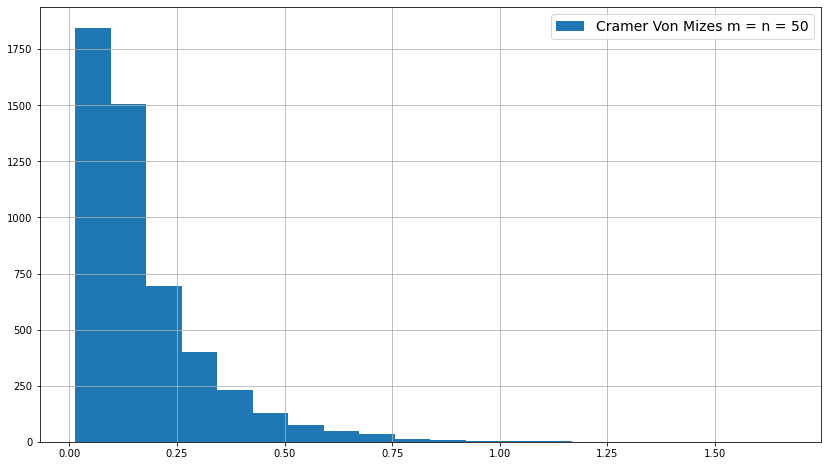

In [429]:
np.random.seed(2022)
cvm_stats = []
fp_count = 0

for _ in range(k_experiments):
    sample_1 = distr_1.rvs(n_common)
    sample_2 = distr_2.rvs(n_common)
    
    res = sps.cramervonmises_2samp(sample_1, sample_2)
    stat = res.statistic
    pval = res.pvalue
    cvm_stats.append(stat)
    
    fp_count += int(pval < alpha)

print(f'fp_ratio = {fp_count/k_experiments:.3}')
print(f'CI = {proportion_confint(fp_count, k_experiments, alpha)}')

plt.figure(figsize=(14, 8))
plt.hist(cvm_stats, bins=20, label=f'Cramer Von Mizes m = n = {n_common}')
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

**Пример с критерием Манна-Уитни и критерием Смирнова**

In [328]:
from tqdm.notebook import tqdm
from statsmodels.stats.proportion import proportion_confint
 

mann_bad_cnt = 0
ks_bad_cnt = 0
ttest_bad_cnt = 0
sz = 50000
alpha = 0.01

np.random.seed(42)
 
for i in tqdm(range(sz)):
    test = sps.expon(loc=2, scale=10).rvs(500)
    control = sps.expon(loc=2, scale=10).rvs(500)
    test += 0.5
     
    mann_pvalue = sps.mannwhitneyu(control, test, alternative='less').pvalue
    ks_pvalue = sps.ks_2samp(control, test, alternative='greater').pvalue # Потому что он сравнивает F_T > F_C. А в этот момент ET < EC. Поэтому и другая альтернатива
    ttest_pvalue = sps.ttest_ind(control, test, alternative='less').pvalue
    if mann_pvalue < alpha:
        mann_bad_cnt += 1
 
    if ks_pvalue < alpha:
        ks_bad_cnt += 1
     
    if ttest_pvalue < alpha:
        ttest_bad_cnt += 1

# Выводим полученные мощности
print(f"Mann-whitneyu: {round(mann_bad_cnt / sz, 4)}")
print(f"Kolmogorov-Smirnov: {round(ks_bad_cnt / sz, 4)}")
print(f"T-test: {round(ttest_bad_cnt / sz, 4)}")

  0%|          | 0/50000 [00:00<?, ?it/s]

Mann-whitneyu: 0.1599
Kolmogorov-Smirnov: 0.1091
T-test: 0.0633


## Задача 7* (2 балла)

Мы знаем, что критерий согласия Колмогорова не работает для дискретных распределений.

Как модифицировать этот критерий, чтобы он начал работать с равномерным дискретным распределением `scipy.stats.randint(1, 7)`? А как поступить с другими распределениями?